ID #1: 206133332

ID #2: 311337695

# KNN

Consider the [0,1] x [0,1] unit square. In this square we have points of several colors (classes). The goal is determine which color should be used to paint each of the non-painted points in the square. We use KNN  

In [1]:
import numpy as np
import matplotlib.pyplot as plt     

# Generating training set

In [2]:
# color palette
test_colors = ['dodgerblue', 'yellow', 'lightgreen']
train_colors = ['blue', 'orange', 'green']

In [3]:
def generate_data(N, cluster_type):
    """
    Generate 3 clusters of points each of size N. These clusters can be
    either separated, slightly mixed, or completely random.
    
    Args:
        N              - number of points in a single cluster
        cluster_type   - 'separated', 'mixed' or 'random'
        
    Return:
        X_train - numpy array of dim (3N,2) that holds (x,y) point coordinates 
        y_train - numpy array of dim (3N,) that holds labels (0,1, or 2)
    """
    np.random.seed(seed=50)
    
    if cluster_type == 'separated':
        x1 = 1 + 3*np.random.rand(N)
        y1 = 1 + 3*np.random.rand(N)

        x2 = 7 + 4*np.random.rand(N)
        y2 = 2 + 4*np.random.rand(N)

        x3 = 14 + 2*np.random.rand(N)
        y3 = 6  + 5*np.random.rand(N)
        
    elif cluster_type == 'mixed':
        x1 = 1 + 3*np.random.rand(N)
        y1 = 1 + 3*np.random.rand(N)

        x2 = 2 + 4*np.random.rand(N)
        y2 = 2 + 4*np.random.rand(N)

        x3 = 3 + 5*np.random.rand(N)
        y3 = 3 + 5*np.random.rand(N)
        
    elif cluster_type == 'random':
        x1 = np.random.rand(N)
        y1 = np.random.rand(N)

        x2 = np.random.rand(N)
        y2 = np.random.rand(N)

        x3 = np.random.rand(N)
        y3 = np.random.rand(N)
    else:
        return (None, None)
    
    # normalizing so that points are in the [0,1]x[0,1] box
    max_x = max(max(x1), max(x2), max(x3))
    x1 /= max_x
    x2 /= max_x
    x3 /= max_x
    max_y = max(max(y1), max(y2), max(y3))
    y1 /= max_y
    y2 /= max_y
    y3 /= max_y
        

    # preparing X_train by concatenating the three sets of points
    col1 = np.concatenate((x1, x2, x3))  # array of shape (3N,)
    col2 = np.concatenate((y1, y2, y3))  # array of shape (3N,)

    # reshaping into (N,2)
    col1 = col1.reshape(-1,1)                   # -1 means whichever value that make the reshape work
    col2 = col2.reshape(-1,1)

    X_train = np.column_stack((col1, col2))
    X_train = np.around(X_train,2)              # rounding to two decimals

    # preparing y_train by setting the proper labels 
    y_train = np.ones (3*N)
    y_train[0:N] -= 1 
    y_train[2*N:3*N] += 1

    return (X_train, y_train)

### Create and plot training set

In [4]:
N= 70
#X_train, y_train = generate_data(N, 'separated')
X_train, y_train = generate_data(N, 'random')
#X_train, y_train = generate_data(N, 'mixed')

print ('X_train shape: ', X_train.shape)
print ('X_train first 10 points:')
print (X_train[0:10,])
print()

print ('y_train shape: ', y_train.shape)
#print ('y_train first 10 points:')
#print (y_train[0:10,])

X_train shape:  (210, 2)
X_train first 10 points:
[[0.5  0.69]
 [0.23 0.98]
 [0.26 0.23]
 [0.4  0.73]
 [0.38 0.81]
 [1.   0.95]
 [0.41 0.86]
 [0.77 0.43]
 [0.76 0.01]
 [0.31 0.04]]

y_train shape:  (210,)


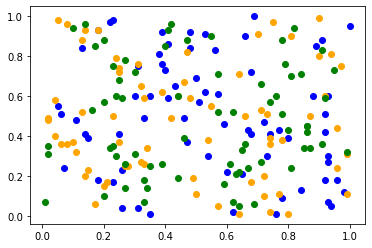

In [5]:
#plotting train points
for i in range(3):
    a_trn = X_train[np.where(y_train ==i)][:,0]  # grab X_train points for which label is i. grab x coordinate
    b_trn = X_train[np.where(y_train ==i)][:,1]  # grab X_train points for which label is i. grab y coordinate 
    plt.scatter(a_trn, b_trn, color=train_colors[i], label = i,)
    
plt.show()


## Creating test points

In [6]:
# Creting a dense grid of points covering the unit square [0,1]x[0,1]
# If resolution is N=5, then having a total of points (5x5):
#
#       [0. , 0. ],
#       [0. , 0.2],
#       [0. , 0.4],
#       [0. , 0.6],
#       [0. , 0.8],
#       [0.2, 0. ],
#       [0.2, 0.2],
#       [0.2, 0.4],
#       [0.2, 0.6],
#       [0.2, 0.8],
#       [0.4, 0. ],
#       [0.4, 0.2],
#       [0.4, 0.4],
#       [0.4, 0.6],
#       [0.4, 0.8],
#       [0.6, 0. ],
#       [0.6, 0.2],
#       [0.6, 0.4],
#       [0.6, 0.6],
#       [0.6, 0.8],
#       [0.8, 0. ],
#       [0.8, 0.2],
#       [0.8, 0.4],
#       [0.8, 0.6],
#       [0.8, 0.8]
#

resolution = 100
X_test = np.ones((resolution*resolution, 2))
for i in np.arange(0,resolution,):
    for j in np.arange(0,resolution):
        X_test[i*resolution + j,0] = i/resolution   
        X_test[i*resolution + j,1] = j/resolution
        
        
print ('Shape of X_test:', X_test.shape)
#print (X_test)

Shape of X_test: (10000, 2)


# Use KNN to paint the whole unit square

## Importing relavent libraries.

In [7]:
from pylab import rcParams
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

### Exercise:

1. Define a nearset neighbor classifier using KNeighborsClassifier and use it along with the training data to produce prediction for the given test points (X_test). 
2. Place your precdiction in the variable y_pred.
3. Plot below both train and test. See if result makes sense

repeat the above for the three modes of training data - 'separated', 'random', 'mixed'. 
1. For 'mixed' mode, try K=1 and K=9. Can you see a difference? 
#### ANSWER 1:
##### Yes there are differences in the rate of simplicity in which the predictions are made: k=1 yields more complex bounderies that overlap each other, there are more 'islands' that is created due to the overitting caused by using k=1, while for k=9 the bounderies are more simply observed and sighted.

2. Use K=3, 'mixed' data with both L1 and L2 distances (i.e., manhattan and euclidean distances, respectively). Can you see a difference in the boundary shape?
#### ANSWER 2:
##### Yes we can observe the differences, although they are pretty minor. In overall we can say that the differences are expressed more at the sides(outer bounderies) of the unit square - hence the change in the distance measurement method influences mostly the prediction of the points which are far from most of the datapoints , which we can regard them as points with some 'outlieric' characteristics. 

For each combination of data and hyper-parameters plot a graph. In the graph title, include the hyper-parameters and the data type ('separated', 'random', 'mixed').

## Plotting train and test points

In [8]:
rcParams['figure.figsize'] = 8, 5  # width, height
def plot_k(X_train, y_train, X_test, y_pred, mode, p=None, k=5):
    
    #plotting test and points:
    for i in range(3):
        a_trn = X_train[np.where(y_train ==i)][:,0]  # grab X_train points for which label is i. grab the x coordinate
        b_trn = X_train[np.where(y_train ==i)][:,1]  # grab X_train points for which label is i. grab the y coordinate
        a_tst = X_test[np.where(y_pred ==i)][:,0]    # grab X_train points for which label is i. grab the x coordinate
        b_tst = X_test[np.where(y_pred ==i)][:,1]    # grab X_train points for which label is i. grab the y coordinate

        plt.scatter(a_tst, b_tst, color=test_colors[i])
        plt.scatter(a_trn, b_trn, color=train_colors[i], label = i,)
    if p:
        plt.title('{} KNN (k={}) , p={} '.format(mode, k, p))
    else:
        plt.title('{} KNN (k={})'.format(mode, k))
    plt.show()



## Veriables and hyper-parameters 

In [9]:
# Number of variables that we will work with.
N= 70
# assigning the K value.
k_list = [1,3,9]
#L1 and L2 distances (i.e., manhattan and euclidean distances, respectively)
calc_distance_type = [1,2] 
# The way our data will be scattered.
modes = ['separated', 'random', 'mixed' ]

### Exercise solution:

# Part 1:

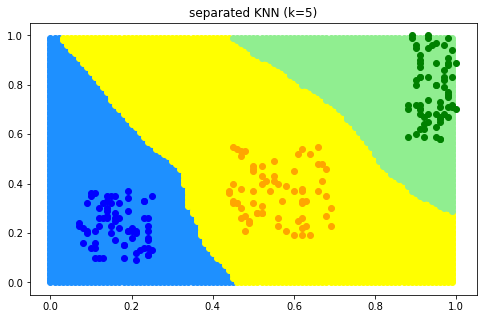

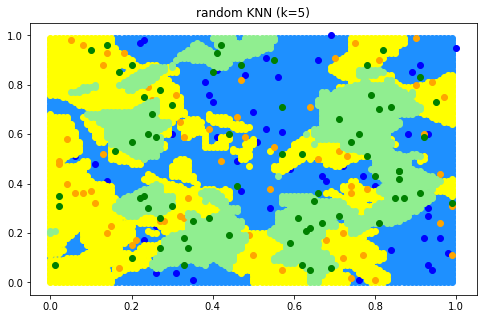

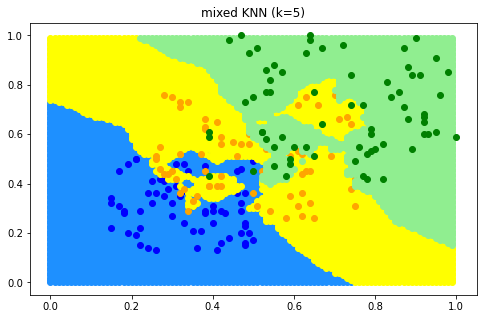

In [10]:
for mode in modes:
    X_train, y_train = generate_data(N,mode)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    plot_k(X_train, y_train, X_test, y_pred, mode)

# part 2 - mixed mode

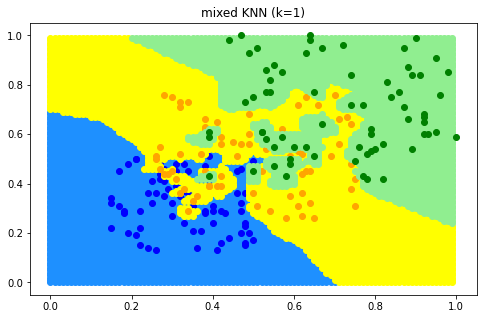

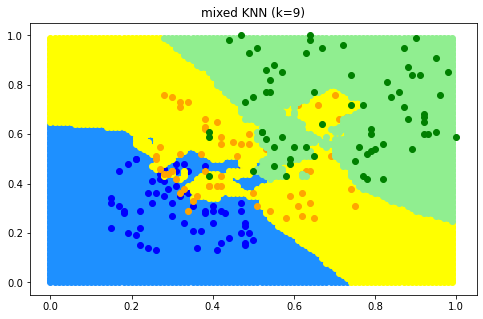

In [11]:
for k in [1,9]:
    X_train, y_train = generate_data(N,'mixed' )
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    plot_k(X_train, y_train, X_test, y_pred, 'mixed',k=k)

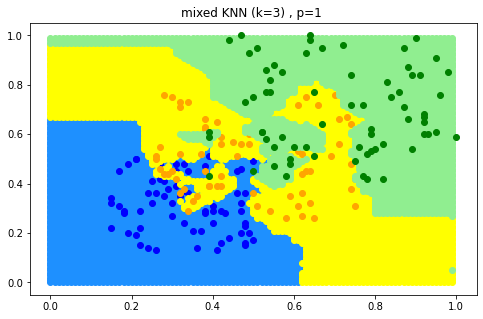

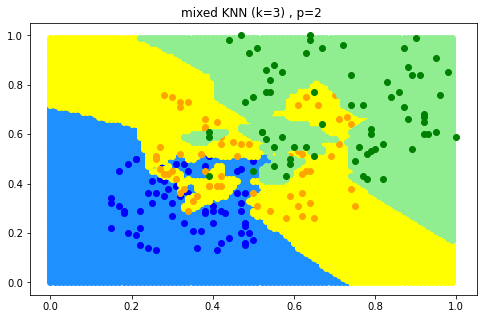

In [12]:
for p in calc_distance_type:
    X_train, y_train = generate_data(N,'mixed')
    knn = KNeighborsClassifier(n_neighbors=3, p=p)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    plot_k(X_train, y_train, X_test, y_pred, 'mixed',p, k=3)

## part 3 - data and hyper-parameters combinations

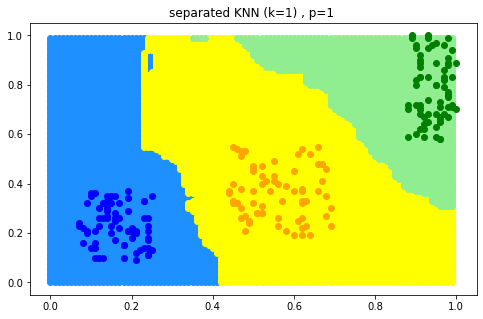

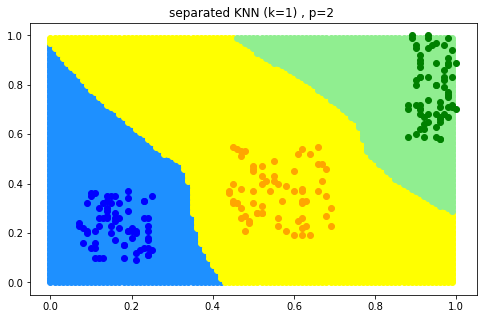

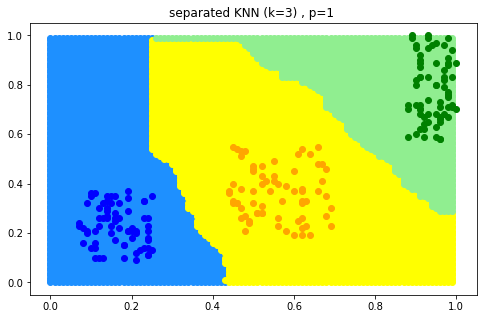

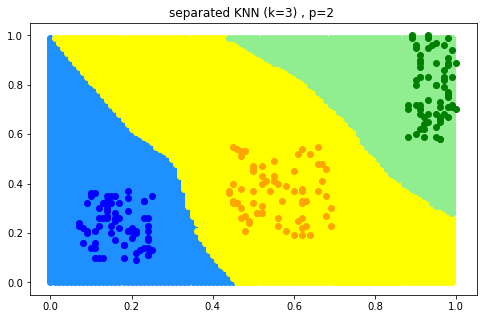

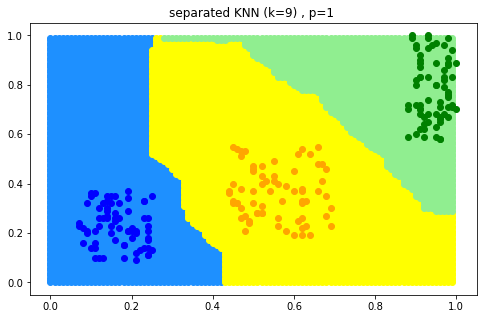

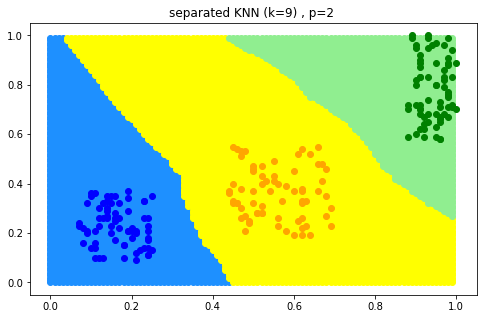

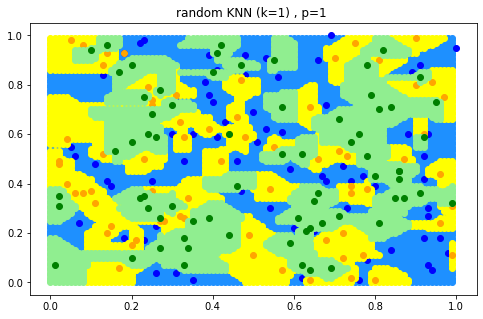

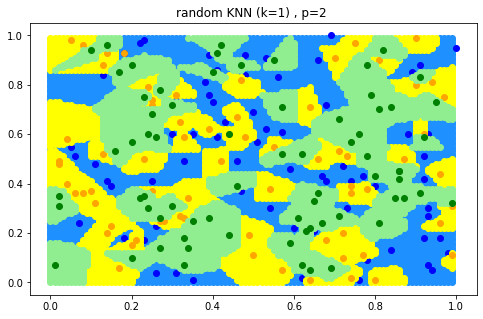

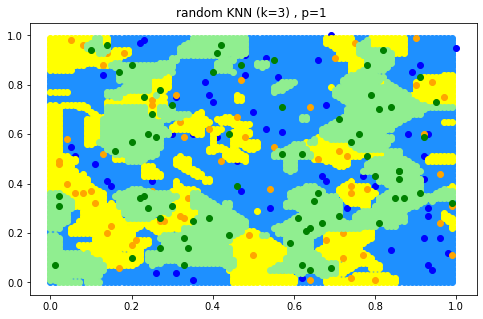

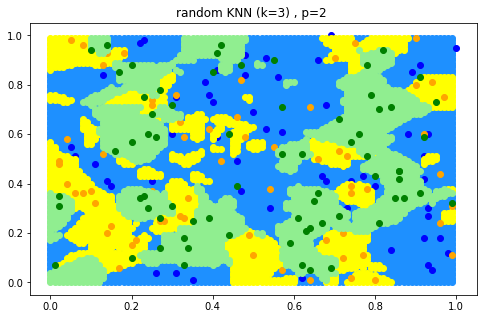

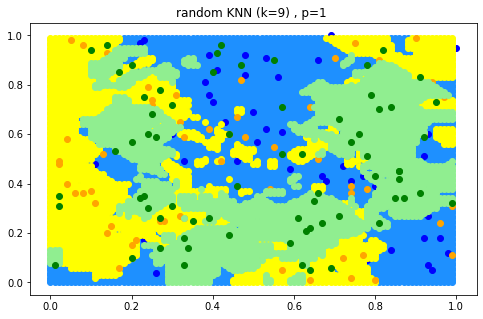

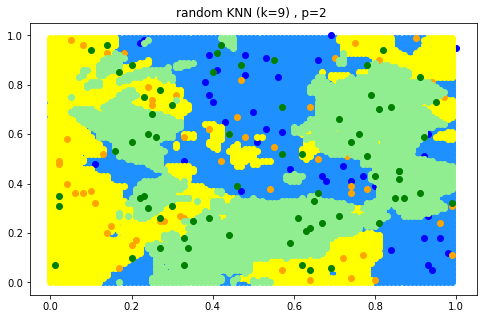

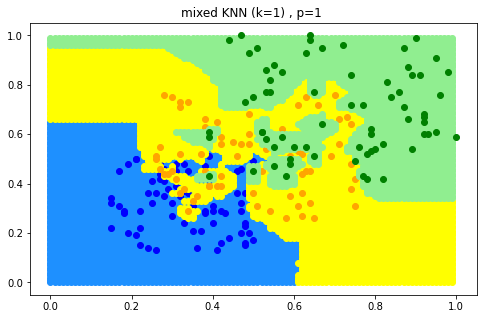

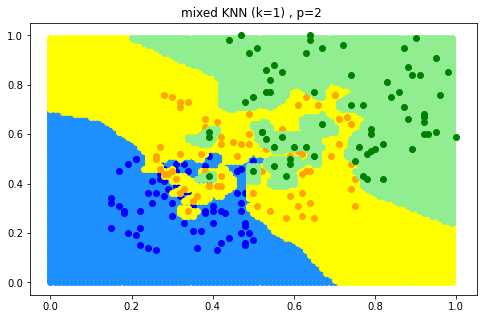

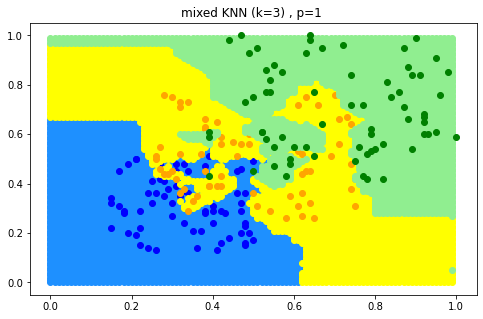

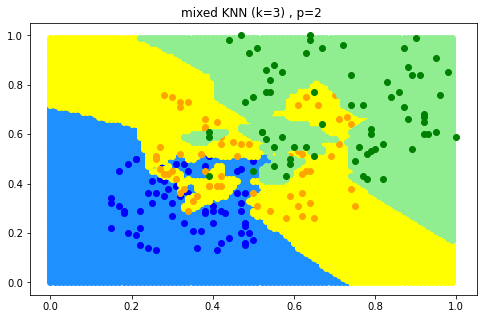

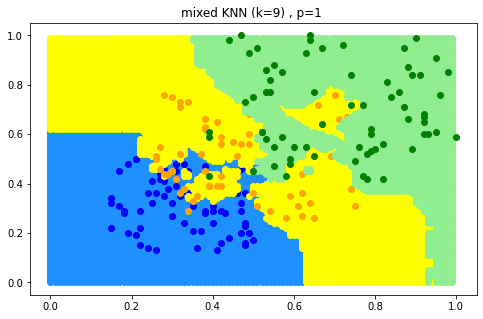

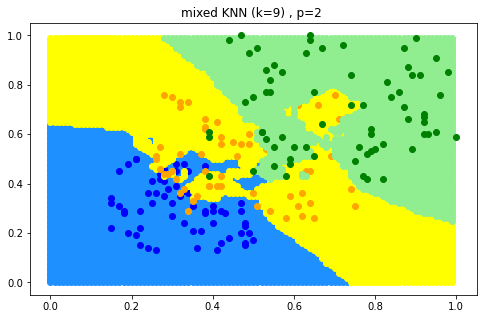

In [13]:
for mode in modes:
    X_train, y_train = generate_data(N, mode)
    for k in k_list:
        for p in calc_distance_type:
            knn = KNeighborsClassifier(n_neighbors=k, p=p) 
            knn.fit(X_train, y_train)
            y_pred=knn.predict(X_test)
            plot_k(X_train, y_train, X_test, y_pred, mode, p, k)